<a href="https://colab.research.google.com/github/dhruvskrim123/Student-Mental-health-Analysis-/blob/main/MNIST%20Digit%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv layer with 32 filters, 3x3 kernel
    layers.BatchNormalization(),  # Batch normalization
    layers.MaxPooling2D((2, 2)),  # Max pooling with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'),  # Conv layer with 64 filters, 3x3 kernel
    layers.BatchNormalization(),  # Batch normalization
    layers.MaxPooling2D((2, 2)),  # Max pooling with 2x2 pool size
    layers.Conv2D(128, (3, 3), activation='relu'),  # Conv layer with 128 filters, 3x3 kernel
    layers.BatchNormalization(),  # Batch normalization
    layers.Flatten(),  # Flatten the output
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    layers.Dropout(0.5),  # Dropout lay
    er with 50% dropout rate
    layers.Dense(10, activation='softmax')  # Output layer with 10 units and softmax activation
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 54s 69ms/step - loss: 0.1656 - accuracy: 0.9506 - val_loss: 0.0556 - val_accuracy: 0.9818
Epoch 2/10
750/750 [==============================] - 50s 66ms/step - loss: 0.0675 - accuracy: 0.9805 - val_loss: 0.0598 - val_accuracy: 0.9828
Epoch 3/10
750/750 [==============================] - 51s 68ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0387 - val_accuracy: 0.9895
Epoch 4/10
750/750 [==============================] - 49s 65ms/step - loss: 0.0387 - accuracy: 0.9886 - val_loss: 0.0573 - val_accuracy: 0.9852
Epoch 5/10
750/750 [==============================] - 52s 69ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0451 - val_accuracy: 0.9894
Epoch 6/10
750/750 [==============================] - 49s 66ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0377 - val_accuracy: 0.9910
Epoch 7/10
750/750 [==============================] - 51s 68ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0464 - accuracy: 0.9902

Test accuracy: 0.9901999831199646


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

313/313 [==============================] - 6s 17ms/step


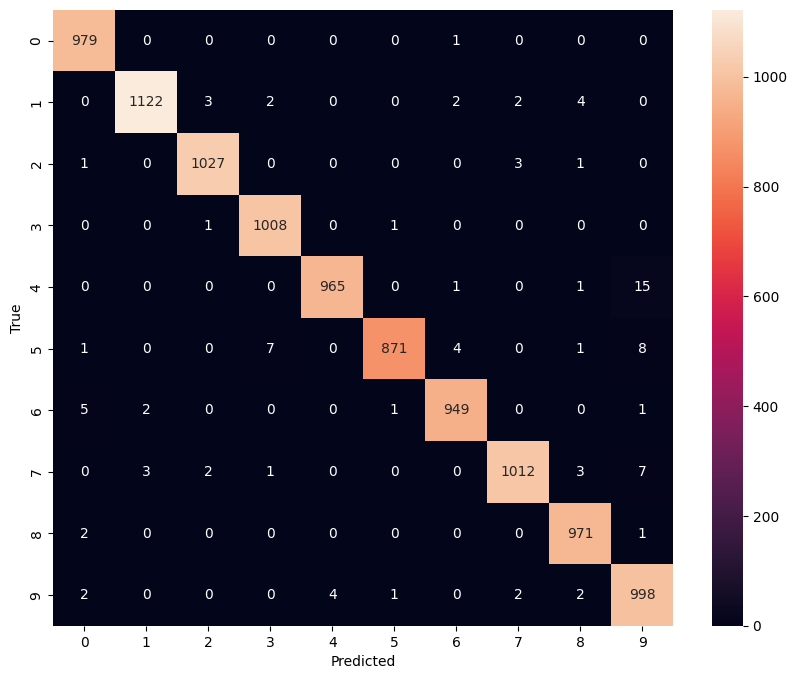

In [ ]:
# Confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


313/313 [==============================] - 5s 15ms/step


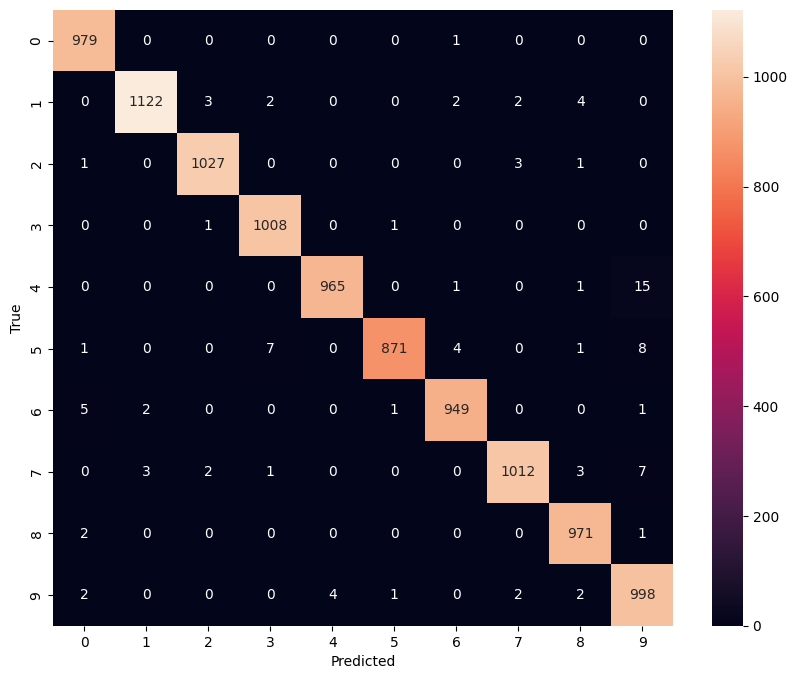

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.show()


In [ ]:
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()




In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 70s 46ms/step - loss: 0.0433 - accuracy: 0.9879 - val_loss: 0.0612 - val_accuracy: 0.9872
Epoch 2/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0285 - accuracy: 0.9920 - val_loss: 0.0588 - val_accuracy: 0.9902
Epoch 3/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.0542 - val_accuracy: 0.9896
Epoch 4/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0469 - val_accuracy: 0.9915
Epoch 5/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0221 - accuracy: 0.9942 - val_loss: 0.0433 - val_accuracy: 0.9917


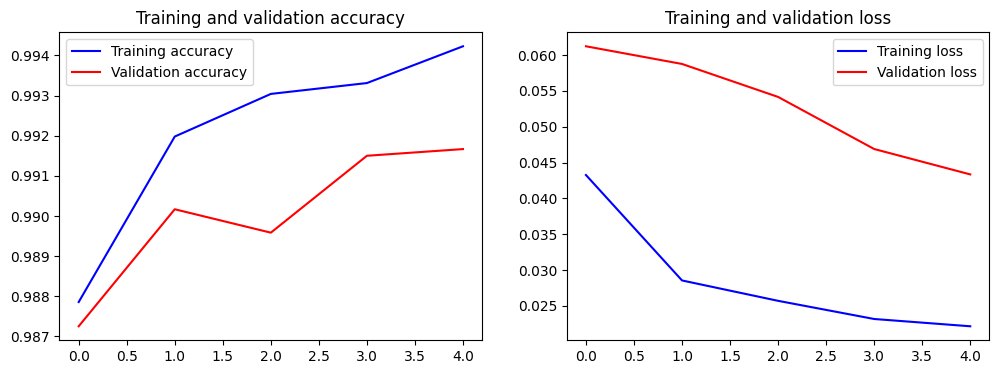

In [ ]:
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_metrics(history)



NameError: name 'classification_report' is not defined